# Gaussian Process - sinoid noisy 2

1. Generate noisy sinoid data
2. Fit a Gaussian Process Model 
3. Generate data from our fit model

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from random import sample

## 1 - Generate noisy sinoid data

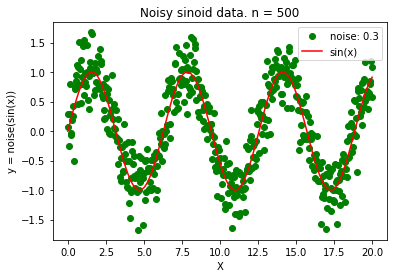

In [26]:
n = 500
noise = .3
X = np.linspace(0, 20, n)
Y = np.sin(X)
Y_noise = []
for i in range(len(X)):
    x = X[i]
    y = Y[i]
    y_noise = np.random.normal(loc=y, scale=noise)
    Y_noise.append(y_noise)
plt.title('Noisy sinoid data. n = ' + str(n))
plt.plot(X, Y_noise, 'go', label='noise: ' + str(noise))
plt.plot(X, Y, 'r', label='sin(x)')
plt.xlabel('X')
plt.ylabel('y = noise(sin(x))')
plt.legend(loc='best')
plt.show()

## 2 - Fit a Gaussian Process Model 

Note how it seems somewhat optimal between 15 and 20 observations. Supposed to be like that, how to interpret these low variance spikes in between observations? Lets get back to that later on.

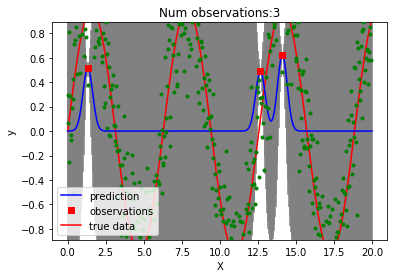

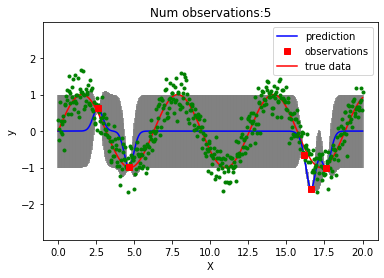

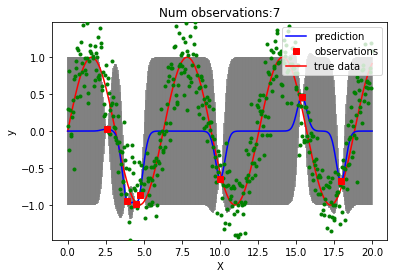

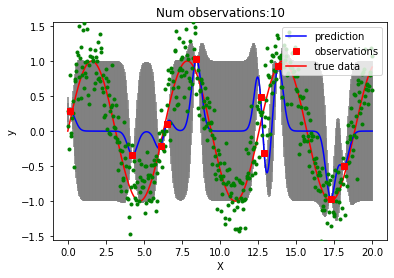

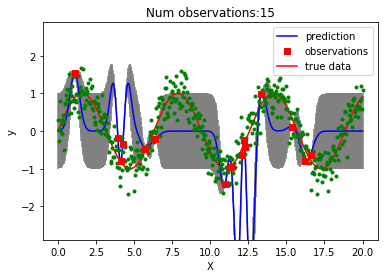

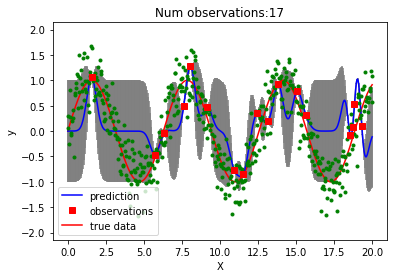

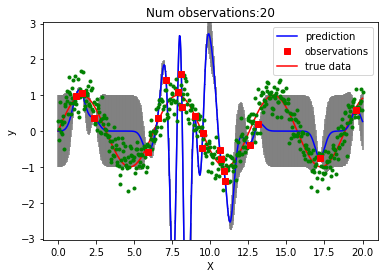

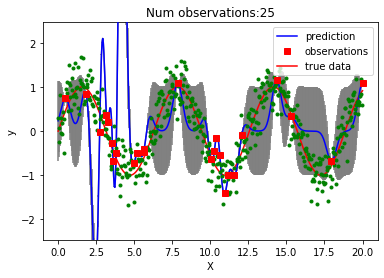

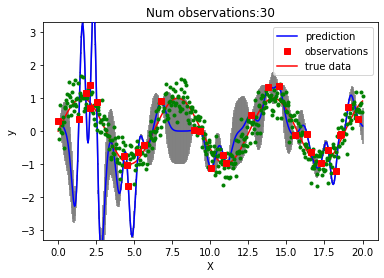

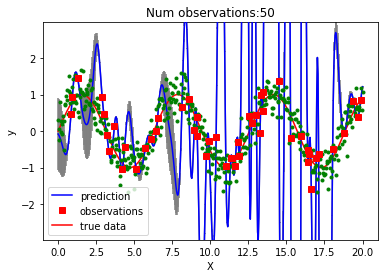

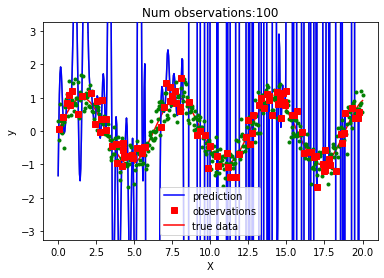

In [29]:
def kernel(a, b):
    return np.exp(-.5 * 1/.1 * (np.subtract.outer(a, b)**2))
    
def predict(x, data, K, t):
    Kx = [kernel(x, x_) for x_ in data]
    Kinv = np.linalg.inv(K + 1e-15*np.eye(len(K)))
    y_pred = np.dot(Kx, Kinv).dot(t)
    sigma_new = kernel(x, x) - np.dot(Kx, Kinv).dot(Kx)
    return y_pred, sigma_new

def fit_with_observations(X, Y, Y_noise, m, art=False):
    observations = sample(list(np.arange(len(X))), m)
    x, y, = list(), list()
    for observation in observations:
        x_new = X[observation]
        y_new = Y_noise[observation]
        x.append(x_new)
        y.append(y_new)
        K = kernel(x, x)
        y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X])
    if art:
        plt.title('Num observations:' + str(m))
        plt.errorbar(X, y_pred, yerr=sigmas, color='grey', zorder=1)
        plt.plot(X, Y_noise, 'g.', zorder=4)
        plt.plot(X, y_pred, 'b', label='prediction', zorder=3)
        plt.plot(x, y, 'rs', label='observations', zorder=5)
        plt.plot(X, Y, 'r', label='true data', zorder=2)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.ylim(-np.amax(np.square(y))-.5, np.amax(np.square(y))+.5)
        plt.legend(loc='best')
        plt.show()
    return y_pred, sigmas
        
for m in (3, 5, 7, 10, 15, 17, 20, 25, 30, 50, 100):
    fit_with_observations(X, Y, Y_noise, m=m, art=True)

## Generate data from model



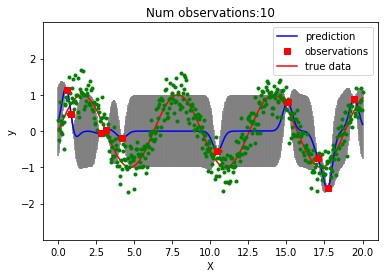

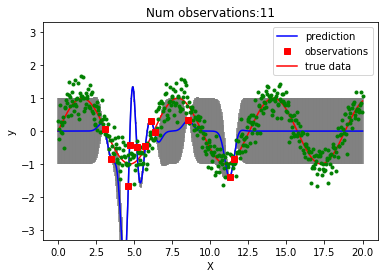

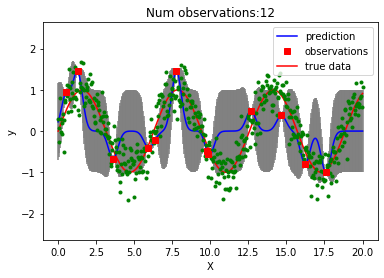

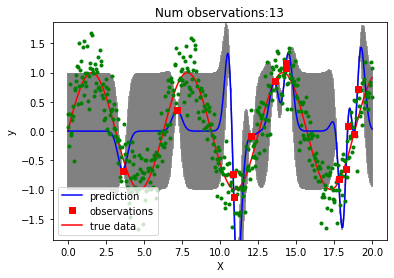

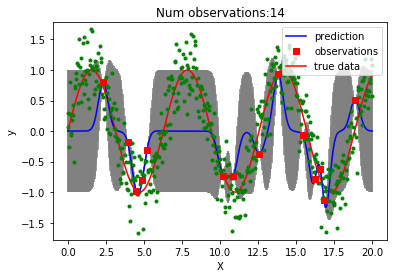

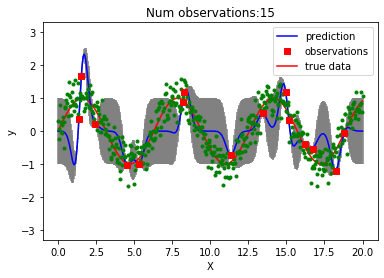

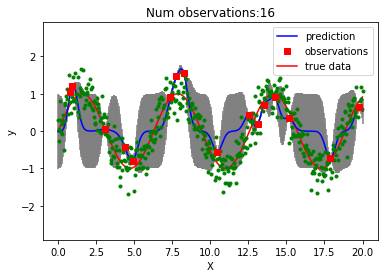

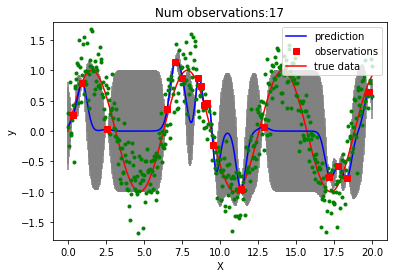

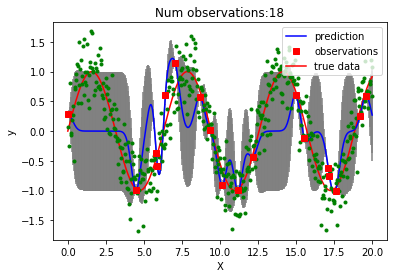

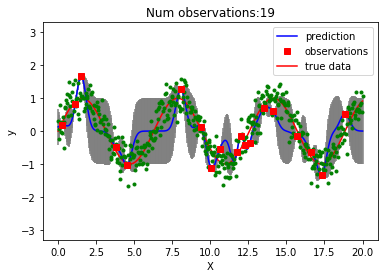

In [30]:
result =[]
for m in (19):
    result.append(fit_with_observations(X, Y, Y_noise, m=m, art=True))

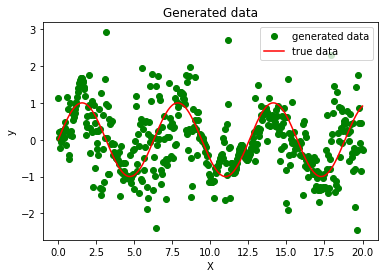

In [41]:
mu_gp = result[-1][0]
sigma_gp = result[-1][1]
Y_gen = list()
for i in range(len(X)):
    y = np.random.normal(loc=mu_gp[i], scale=sigma_gp[i])
    Y_gen.append(y)
plt.title('Generated data')
plt.plot(X, Y_gen, 'go', label='generated data')
plt.plot(X, Y, 'r', label='true data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

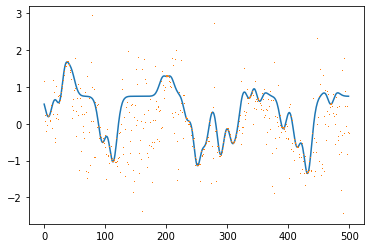

In [47]:
plt.plot(np.random.multivariate_normal(mu_gp, np.outer(sigma_gp, sigma_gp)), zorder=2)
plt.plot(Y_gen, ',')